# Import

In [1]:
#First we import the necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set ()
import scipy
import scipy.stats
import statistics

In [2]:
#we load the data set
df = pd.read_csv("new-seismic-bumps.csv")

In [3]:
#We show the dataset
df

,magnitude,time
0,2000,1
1,3000,3
2,1000,6
3,4000,7
4,500,9
...,...,...
1115,90000,2554
1116,600,2555
1117,6000,2567
1118,1000,2569


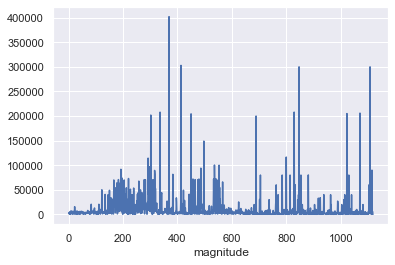

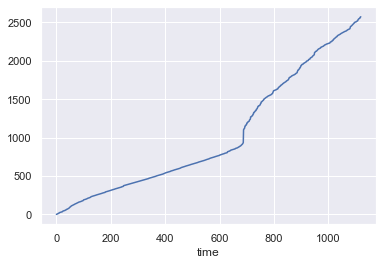

In [4]:
#we make a plot for every columns to visualize the data and see possible correlations
for column in df.head():
    plt.plot(df[column])
    plt.xlabel(column)
    plt.show()

In [5]:
from MHP import MHP

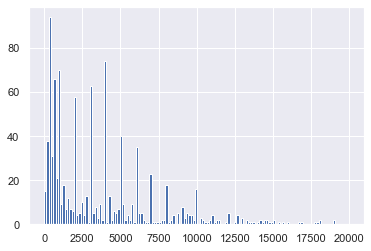

In [6]:
h=plt.hist(df["magnitude"], bins=np.arange(0,20000,150))
plt.show()

In [7]:
from scipy.stats import skew
from scipy.stats import kurtosis

In [8]:
print(skew(df["magnitude"]))
print(kurtosis(df["magnitude"]))

6.722883814802735
59.63407335595078


In [9]:
energy=df["magnitude"]-statistics.mean(df["magnitude"])

In [10]:
statistics.mean(df["magnitude"])

11478.660714285714

In [11]:
print(max(energy))

390521.33928571426


In [12]:
print(min(energy))

-11428.660714285714


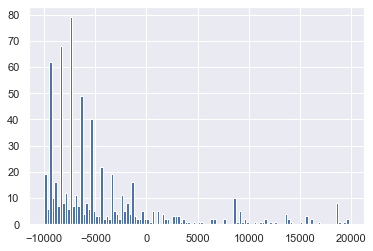

In [15]:
plt.hist(energy, bins=np.arange(-10000,20000,250))
plt.show()

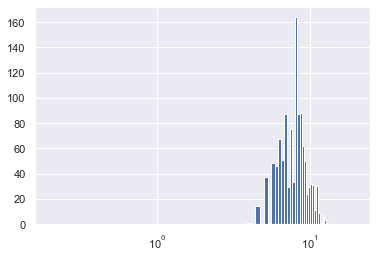

In [14]:
plt.hist(np.log(df["magnitude"]), bins=np.arange(-1,20,0.3))
plt.xscale("log")
plt.show()

In [19]:
mhat = np.random.uniform(0,1, size=3)
ahat = np.random.uniform(0,1, size=(3,3))
w = 3.

P.EM(ahat, mhat, w)

After ITER 0 (old: -10000.000 new: -0.023)
 terms 12.6455, 14.7011, 13.2989
After ITER 10 (old: -0.023 new: -1.047)
 terms -10.6346, 9.3250, 18.6750
Reached stopping criterion. (Old: -1.047 New: -1.045)


(array([[8.03061317e-12, 1.52300133e-01, 4.78642493e-09],
        [9.96832978e-01, 3.16698332e-03, 6.69256394e-08],
        [9.42508910e-08, 5.45454442e-01, 1.66565498e-08]]),
 array([1.77974997e-01, 4.44971663e-10, 2.54105705e-22]))

In [47]:
dfa = df.to_numpy()

In [48]:
dfa = dfa[:100]

In [49]:
dfa[:, 0]

array([ 2000,  3000,  1000,  4000,   500,  5000,   400,  6000,   600,
        7000,  4000,  6000,  4000,  1400,  6000,   600,  6000,  6000,
        2000,  1500,  6000,   700, 15700,  5000,  2700,  5000,   500,
        1800,  6000,   300,   400,  7000,  4000,   800,  4000,  1400,
        5000,  4300,   900,  5000,   800,  6000,  4300,  5000,   600,
        6000,  4000,  6000,  5000,  6000,  5000,  4000,   800,  4000,
        5000,  3000,   200,  3000,  3000,  4000,  4000,  3000,   300,
        4000,  2000,  4000,  3000,  4000,  3000,  2000,  8000,  2700,
        5000,  3000,  6000,  4000,   900,  5000,   900,  4000,  3000,
         900, 10000, 20600,  2400,  3000,  3900,  5000,  3700,  5000,
        7000,  8000,   700,   800,  9700, 13000,  4000,  2600,  6000,
        2000], dtype=int64)

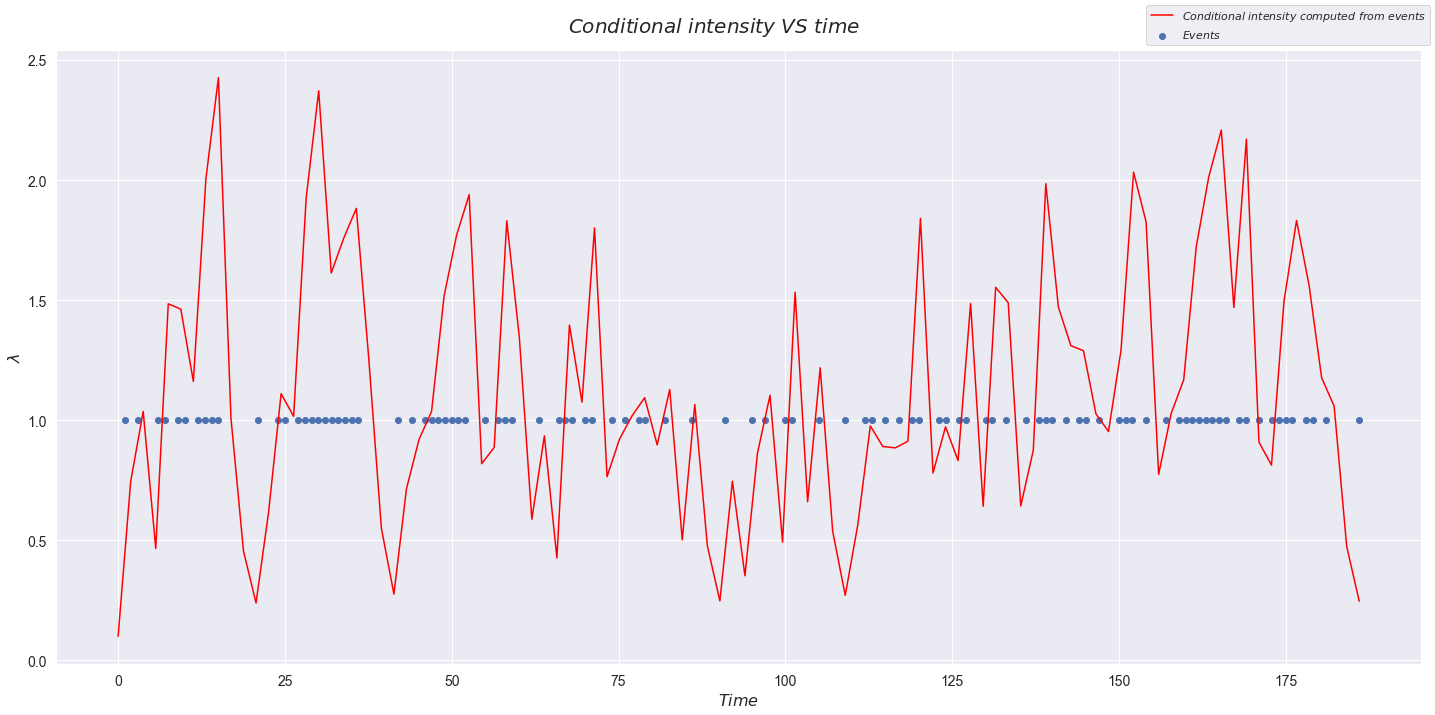

In [53]:
import math, matplotlib
import matplotlib.lines

mu = 0.1 # Parameter values as found in the article http://jheusser.github.io/2013/09/08/hawkes.html Hawkes Process section.
alpha = 1.0
beta = 0.5

EventTimes = dfa[:, 1]

" Compute conditional intensities for all times using the Hawkes process. "
timesOfInterest = np.linspace(0.0, dfa[-1,1], 100) # Times where the intensity will be sampled.
conditionalIntensities = [] # Conditional intensity for every epoch of interest.
for t in timesOfInterest:
     conditionalIntensities.append( mu + np.array( [alpha*math.exp(-beta*(t-ti)) if t > ti else 0.0 for ti in EventTimes] ).sum() ) # Find the contributions of all preceding events to the overall chance of another one occurring. All events that occur after t have no contribution.

" Plot the conditional intensity time history. "
fig = plt.figure(figsize=(20,10))
ax = fig.gca()

labelsFontSize = 16
ticksFontSize = 14

fig.suptitle(r"$Conditional\ intensity\ VS\ time$", fontsize=20)
ax.grid(True)
ax.set_xlabel(r'$Time$',fontsize=labelsFontSize)
ax.set_ylabel(r'$\lambda$',fontsize=labelsFontSize)
matplotlib.rc('xtick', labelsize=ticksFontSize) 
matplotlib.rc('ytick', labelsize=ticksFontSize)

eventsScatter = ax.scatter(EventTimes,np.ones(len(EventTimes))) # Just to indicate where the events took place.

ax.plot(timesOfInterest, conditionalIntensities, color='red', linestyle='solid', marker=None, markerfacecolor='blue', markersize=12)
fittedPlot = matplotlib.lines.Line2D([],[],color='red', linestyle='solid', marker=None,  markerfacecolor='blue', markersize=12)

fig.legend([fittedPlot, eventsScatter], [r'$Conditional\ intensity\ computed\ from\    events$', r'$Events$'])
plt.show()